In [13]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np

In [28]:
data=pd.read_csv("card_transdata.csv",low_memory=False)

In [39]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


AttributeError: 'numpy.float64' object has no attribute 'startswith'

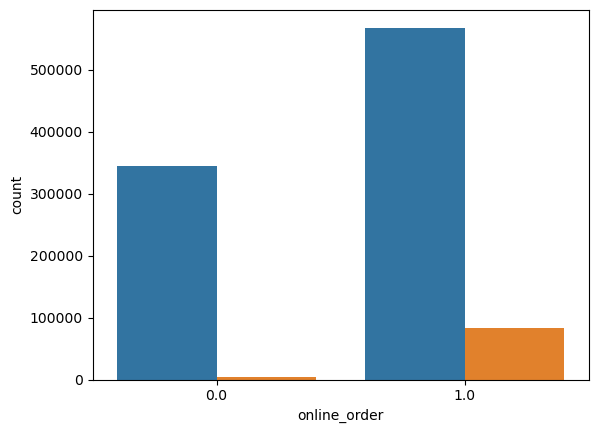

In [37]:
sns.countplot(x='online_order',data=data,hue='fraud')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance_from_home', ylabel='Density'>

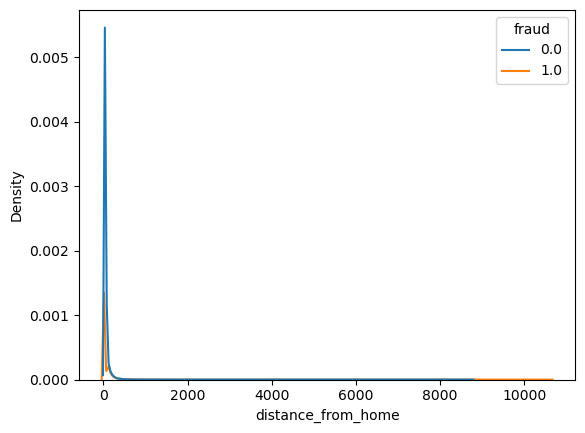

In [41]:
sns.kdeplot(x='distance_from_home',data=data,hue='fraud')

<Axes: xlabel='fraud', ylabel='distance_from_home'>

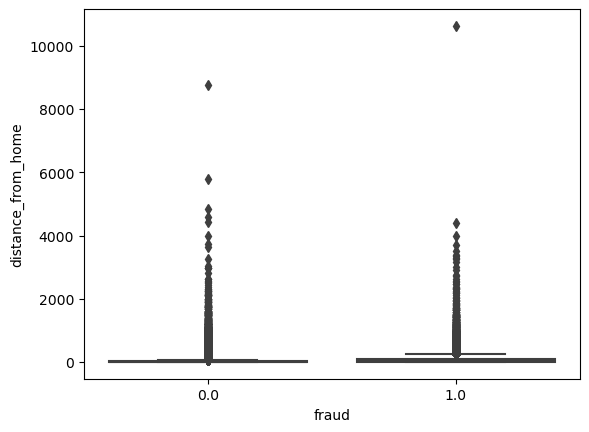

In [45]:
sns.boxplot(x='fraud',y='distance_from_home',data=data)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log', ylabel='Density'>

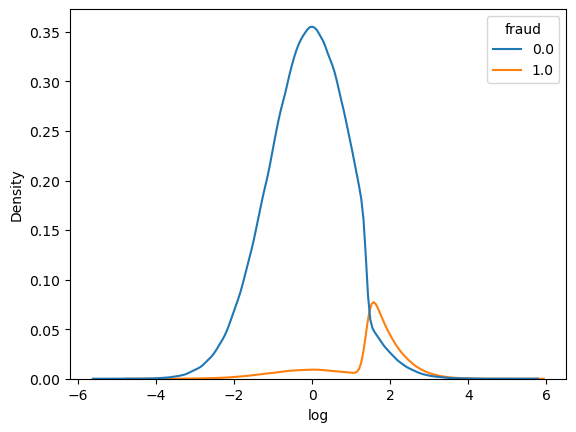

In [51]:
sns.kdeplot(x='log',data=data,hue='fraud')

In [49]:
data['log']=np.log(data['ratio_to_median_purchase_price'])

In [53]:
from sklearn.model_selection import train_test_split

In [113]:
y=data['fraud']
x=data.drop(columns=['fraud'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree as pte
from sklearn.ensemble import RandomForestClassifier as RC
from sklearn.naive_bayes import GaussianNB as nb

In [67]:
x_train.shape,y_train.shape

((700000, 8), (700000,))

In [87]:
clfs=[('DTC',DTC(criterion='gini'))
,('RC',RC(criterion='gini',n_estimators=10))
,("LR",LR()),('nb',nb())]

In [89]:
clfs[0][1]

DecisionTreeClassifier()

In [91]:
for i in range(len(clfs)):
    print("model is fitting...")
    clfs[i][1].fit(x_train,y_train)

model is fitting...
model is fitting...
model is fitting...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model is fitting...


In [93]:
y_pred=[]
for i in range(len(clfs)):
    print("model is predicting...")
    y_pred.append(clfs[i][1].predict(x_test))

model is predicting...
model is predicting...
model is predicting...
model is predicting...


In [101]:
clfs[1][0]

'RC'

In [95]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [109]:
for i in range(len(clfs)):
    
    print(clfs[i][0],"accuracy_score:",accuracy_score(y_test,clfs[i][1].predict(x_test)),end='/ ')
    print(clfs[i][0],"f1_score:",f1_score(y_test,clfs[i][1].predict(x_test)),end='/ ')
    print(clfs[i][0],"recall:",recall_score(y_test,clfs[i][1].predict(x_test)),end='/ ')
    print(clfs[i][0],"precision:",precision_score(y_test,clfs[i][1].predict(x_test)),end='\n ')
    

DTC accuracy_score: 0.9999733333333334/ DTC f1_score: 0.9998469778117827/ DTC recall: 0.999770484278173/ DTC precision: 0.9999234830514959
 RC accuracy_score: 0.9999766666666666/ RC f1_score: 0.9998660979015628/ RC recall: 0.9997322316578685/ RC precision: 1.0
 LR accuracy_score: 0.9600566666666667/ LR f1_score: 0.7309428115948537/ LR recall: 0.6226379006961977/ LR precision: 0.8848600163087795
 nb accuracy_score: 0.9649466666666666/ nb f1_score: 0.7919518854113085/ nb recall: 0.7656261953943845/ nb precision: 0.8201524340272086
 

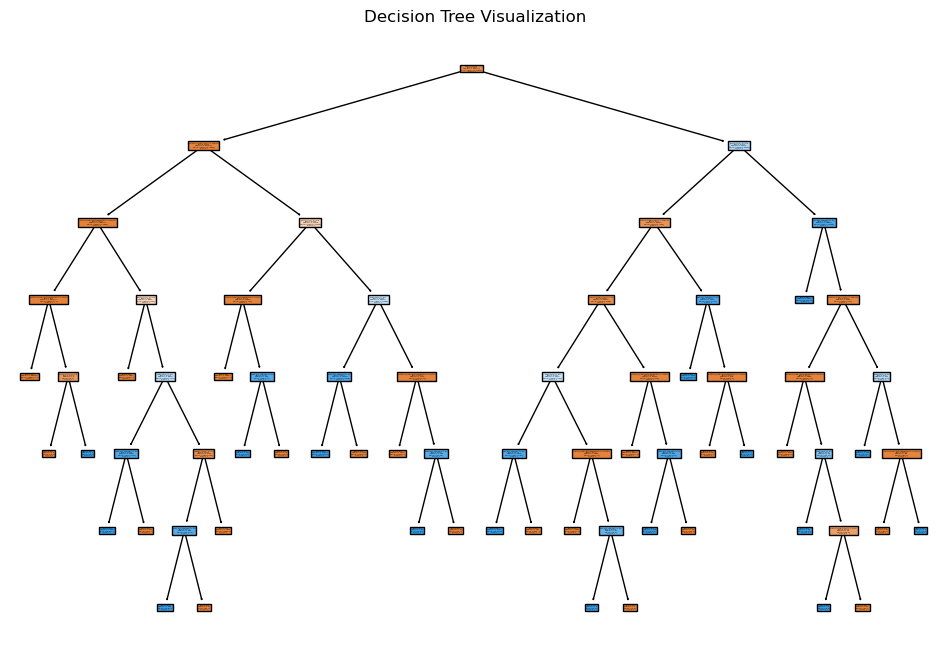

In [131]:
plt.figure(figsize=(12, 8))
pte(clfs[0][1], feature_names=data.drop(columns=['fraud']).columns, class_names='fraud', filled=True)
plt.title("Decision Tree Visualization")
plt.show()

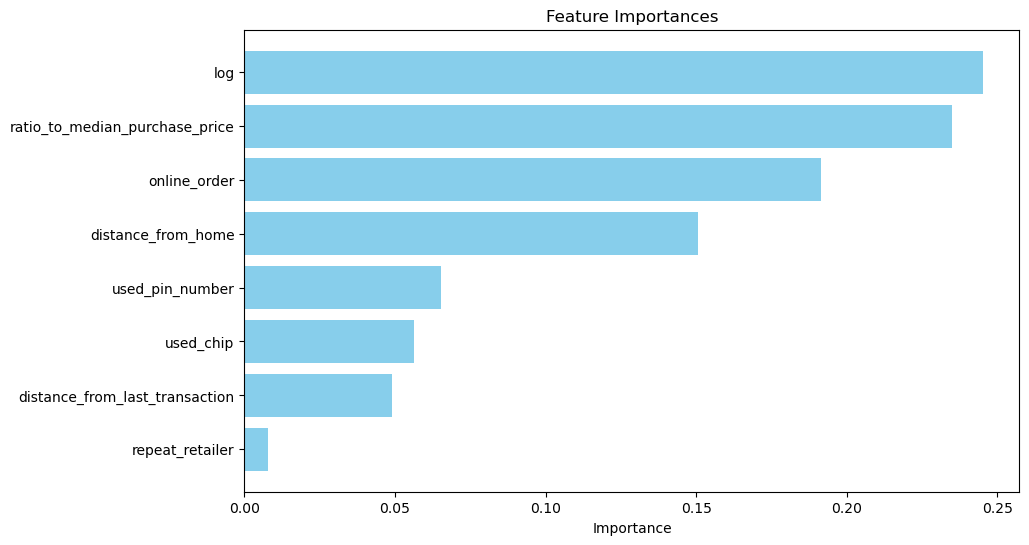

In [207]:
import pandas as pd

feature_names = x_train.columns  
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()